In [1]:
import torch 
import torchvision 
from torchvision.datasets import MNIST

#### Downloading and splitting  dataset into train and test

In [2]:
dataset = MNIST(root='/home/thor/Srm/Reasearch Papers /Programming/freecodecamp/pytorchjovian/secondclass', download=True)

In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: /home/thor/Srm/Reasearch Papers /Programming/freecodecamp/pytorchjovian/secondclass
    Transforms (if any): None
    Target Transforms (if any): None

In [4]:
len(dataset)

60000

In [5]:
test_dataset = MNIST(root='/home/thor/Srm/Reasearch Papers /Programming/freecodecamp/pytorchjovian/secondclass', train=False)
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: /home/thor/Srm/Reasearch Papers /Programming/freecodecamp/pytorchjovian/secondclass
    Transforms (if any): None
    Target Transforms (if any): None

In [6]:
len(test_dataset)

10000

In [7]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FF123DF3E48>, tensor(5))

This is implemeted using supervised learning 

#### Displaying image on graph

In [8]:
import matplotlib.pyplot as plt

Label : tensor(5)


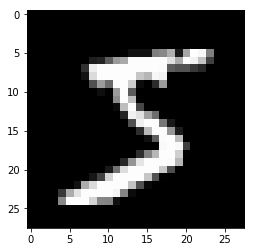

In [9]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label :', label)

label:  tensor(7)


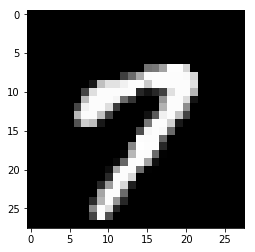

In [10]:
image, label = dataset[15]
plt.imshow(image, cmap='gray')
print('label: ', label)

Label:  tensor(3)


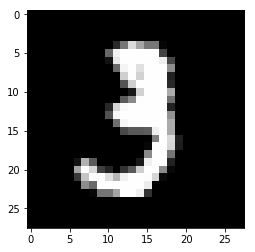

In [11]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label: ', label)

#### Converting images to tensors

Pytorch cannot work with images , therefore the images are converted to tensors with the following class of torchvision

In [12]:
from torchvision.transforms import transforms

Pytorch dataset can be transformed into varoius ways. Here we use .ToTensor() to convert images to tensor when laded to memory.

In [13]:
dataset = MNIST(root='/home/thor/Srm/Reasearch Papers /Programming/freecodecamp/pytorchjovian/secondclass', 
               train=True, transform= transforms.ToTensor())

Now we check the image format.

In [14]:
image_tensor, label = dataset[0]
print(image_tensor.shape, label)

torch.Size([1, 28, 28]) tensor(5)


first element represents color channel. Here it is grayscale therefore its 1, others like RGB have 3. The other tow elements represent the pixel values.

In [18]:
# Checking sample values of the created tensor.
#image_tensor # hepls to the see the entire 28 rows Therefore we use indexing to see a slice of the created tensor.
# Slicing
print(image_tensor[:, 10:15, 10:15]) # first element for grayscale ':' used for one, second row:row, third column:column
print(torch.max(image_tensor), torch.min(image_tensor)) # 1. represents white, 0. for black, values between for gray

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


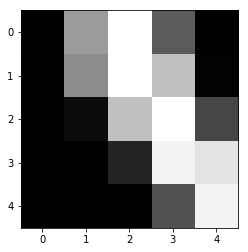

In [15]:
# Plot the sliced image tensor
plt.imshow(image_tensor[0, 10:15, 10:15], cmap='gray')

#### Training and Validation Datasets

Training and validation are done together in order to improve the model as training tends to memorize the information which makes it less efficient over new data. So validation is done by changing the learning rate and other parameters.

In [16]:
# Training and Validation
from torch.utils.data import random_split

We use random_split because if we split uniformly the training and validation set will have only particular set of numbers and not all the numbers in each set. For instance training will have number from 0 to 6 and validation set will have numbers from 7 to 9. This will make the training incomplete and the validation set will make a wrong validation criteria.

In [17]:
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [18]:
# Loading data in batches
from torch.utils.data import DataLoader
batch_size = 128
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size) # Shuffling not required because it is only used for evaaluation and not modifying weights and biases 

#### Model

Using torch built-in functions

In [19]:
import torch.nn as nn

Flatten image tensor by - (28X28) = 784 before being passed int model. The output of the image is taken 10, where each element of the vector represents image label(0 to 9) respectively

In [20]:
input_size = 28*28
num_classes = 10

# Logitic Regression model
model = nn.Linear(input_size, num_classes)

In [21]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0269,  0.0275, -0.0073,  ..., -0.0105, -0.0281, -0.0161],
        [-0.0335, -0.0332, -0.0312,  ..., -0.0251, -0.0315,  0.0356],
        [ 0.0105,  0.0243,  0.0008,  ..., -0.0200, -0.0264, -0.0024],
        ...,
        [-0.0085,  0.0252, -0.0263,  ...,  0.0131,  0.0197, -0.0338],
        [ 0.0319,  0.0230,  0.0309,  ..., -0.0037,  0.0283,  0.0161],
        [-0.0343, -0.0262, -0.0205,  ..., -0.0188,  0.0078, -0.0192]],
       requires_grad=True)

In [22]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0118,  0.0239,  0.0010,  0.0034, -0.0004, -0.0013, -0.0021, -0.0154,
        -0.0069, -0.0280], requires_grad=True)

In [23]:
for images, labels in train_dl:
    print(labels)
    print(images.shape)
    ouputs = model(images)
    break

tensor([1, 6, 0, 9, 7, 0, 4, 2, 3, 2, 2, 3, 1, 9, 8, 1, 0, 2, 7, 2, 5, 4, 7, 9,
        4, 8, 1, 7, 9, 0, 7, 5, 5, 4, 1, 8, 8, 0, 0, 5, 7, 4, 5, 2, 8, 2, 8, 8,
        2, 1, 2, 0, 5, 9, 6, 4, 5, 6, 9, 6, 8, 9, 3, 2, 2, 4, 3, 8, 3, 5, 9, 9,
        5, 1, 0, 1, 1, 0, 0, 0, 7, 3, 3, 2, 8, 3, 9, 4, 0, 0, 1, 0, 1, 2, 1, 9,
        1, 3, 4, 5, 7, 1, 0, 1, 8, 5, 0, 8, 9, 4, 0, 7, 8, 5, 9, 6, 0, 4, 7, 0,
        2, 4, 6, 0, 9, 8, 7, 4])
torch.Size([128, 1, 28, 28])


RuntimeError: size mismatch, m1: [3584 x 28], m2: [784 x 10] at /opt/conda/conda-bld/pytorch_1544174967633/work/aten/src/TH/generic/THTensorMath.cpp:940

Error due to wrong dimension of the image. This needs to be flattened. .reshape() is a tensor method which helps to view the image as flat vector. 

To do so we extend nn.Module class of pytorch and define a custom model.

In [24]:
class MnistModel(nn.Module):
    def __init__(self): # Constructor
        super().__init__() # To call constructor of nn.Module
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x):
        x = x.reshape(-1, 784)
        out = self.linear(x)
        return out
        
model = MnistModel() # Create object of class.
        

First function is a contructor. __init__ constructor method, we instantiate the weights and biases using nn.Linear.  .reshape() is used to change the view of pytorch tensor. -1 represents that pytorch will decide itself what value to pass based on previous tensor. 
This model does not have weight and biases, but instead returns list of weight and biases using .parameters(), which is further used in optimization. 

In [25]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0228,  0.0308,  0.0191,  ..., -0.0234, -0.0272,  0.0334],
         [-0.0349, -0.0151,  0.0001,  ...,  0.0096, -0.0239,  0.0175],
         [-0.0318, -0.0178, -0.0316,  ...,  0.0105,  0.0089,  0.0216],
         ...,
         [ 0.0163, -0.0243, -0.0282,  ...,  0.0072, -0.0148,  0.0214],
         [-0.0334,  0.0171, -0.0338,  ..., -0.0094, -0.0121,  0.0027],
         [ 0.0091, -0.0243, -0.0182,  ...,  0.0060,  0.0310,  0.0192]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0331, -0.0143, -0.0217,  0.0200, -0.0320, -0.0330, -0.0072, -0.0233,
          0.0126,  0.0296], requires_grad=True)]

In [26]:
# Using this model  in for-in loop.
for images, labels in train_dl:
    print('Images: ', images.shape)
    output = model(images)
    break
print('output.shape: ', output.shape)
print('Sample outputs: ', output[:2].data) # Gives output for two images

Images:  torch.Size([128, 1, 28, 28])
output.shape:  torch.Size([128, 10])
Sample outputs:  tensor([[ 0.0227,  0.0833,  0.1454, -0.2663,  0.1954,  0.0615, -0.0631,  0.2042,
          0.2042, -0.0046],
        [-0.1943,  0.1443,  0.1587,  0.0036, -0.2020, -0.0350,  0.1801, -0.1106,
          0.4974, -0.1485]])


We represent outputs as probability that should lie between 0 and 1. But here we have negative outputs. so in order to do so we use Softmax function.

###### Softmax Function

In [27]:
output[0]

tensor([ 0.0227,  0.0833,  0.1454, -0.2663,  0.1954,  0.0615, -0.0631,  0.2042,
         0.2042, -0.0046], grad_fn=<SelectBackward>)

In [28]:
# take exponential to convert negative to positive values for probability
exps = torch.exp(output[0])
exps

tensor([1.0229, 1.0869, 1.1565, 0.7662, 1.2158, 1.0635, 0.9389, 1.2265, 1.2265,
        0.9954], grad_fn=<ExpBackward>)

In [29]:
# Converting numbers that are greater than 1 to lie between 0 and 1
prob = exps / torch.sum(exps)
prob

tensor([0.0956, 0.1016, 0.1081, 0.0716, 0.1136, 0.0994, 0.0878, 0.1146, 0.1146,
        0.0930], grad_fn=<DivBackward0>)

In [30]:
# verifying probability by adding all probabilities which should be equal to 1.
print(torch.sum(prob))

tensor(1.0000, grad_fn=<SumBackward0>)


###### Using built-in torch functions for calclating softmax function

In [31]:
import torch.nn.functional as F 

In [32]:
prob = F.softmax(output, dim=1) # Dimension is 1 because because 0th dimension is for batches and we want to apply softmax on a prticular image

print('Sample Probabilities: ', prob[:2].data)

# Checking sum of probabilities
print('Sum of probabilities: ', torch.sum(prob[0]).item()) # .item() converts zero dimension tensor to a number

Sample Probabilities:  tensor([[0.0956, 0.1016, 0.1081, 0.0716, 0.1136, 0.0994, 0.0878, 0.1146, 0.1146,
         0.0930],
        [0.0781, 0.1096, 0.1112, 0.0953, 0.0776, 0.0916, 0.1136, 0.0850, 0.1561,
         0.0818]])
Sum of probabilities:  1.0


In [33]:
# Predict label by choosing index with highest probability.
max_prob, predict = torch.max(prob, dim=1)
print(max_prob)
print(predict)

tensor([0.1146, 0.1561, 0.1555, 0.1329, 0.1306, 0.1193, 0.1360, 0.1313, 0.1256,
        0.1397, 0.1309, 0.1479, 0.1320, 0.1515, 0.1425, 0.1446, 0.1421, 0.1253,
        0.1317, 0.1349, 0.1365, 0.1232, 0.1236, 0.1164, 0.1436, 0.1293, 0.1202,
        0.1320, 0.1344, 0.1281, 0.1278, 0.1351, 0.1225, 0.1372, 0.1227, 0.1545,
        0.1157, 0.1203, 0.1370, 0.1488, 0.1733, 0.1166, 0.1385, 0.1117, 0.1247,
        0.1197, 0.1204, 0.1352, 0.1357, 0.1292, 0.1293, 0.1230, 0.1290, 0.1893,
        0.1379, 0.1243, 0.1216, 0.1423, 0.1220, 0.1165, 0.1256, 0.1275, 0.1188,
        0.1444, 0.1240, 0.1325, 0.1349, 0.1245, 0.1160, 0.1398, 0.1213, 0.1250,
        0.1248, 0.1254, 0.1414, 0.1370, 0.1208, 0.1176, 0.1500, 0.1274, 0.1330,
        0.1298, 0.1167, 0.1313, 0.1237, 0.1270, 0.1182, 0.1397, 0.1103, 0.1336,
        0.1255, 0.1200, 0.1347, 0.1174, 0.1436, 0.1195, 0.1439, 0.1298, 0.1259,
        0.1368, 0.1388, 0.1399, 0.1440, 0.1240, 0.1158, 0.1376, 0.1163, 0.1283,
        0.1237, 0.1393, 0.1209, 0.1528, 

In [34]:
# Compaing predicted with labels
labels

tensor([7, 7, 2, 3, 5, 7, 9, 5, 8, 8, 9, 9, 9, 5, 2, 0, 4, 3, 8, 7, 5, 8, 1, 1,
        8, 3, 7, 9, 2, 7, 1, 5, 3, 2, 0, 2, 7, 4, 9, 1, 0, 3, 7, 1, 7, 1, 3, 2,
        0, 5, 2, 9, 2, 0, 8, 7, 4, 8, 8, 8, 2, 7, 3, 3, 5, 6, 9, 5, 9, 7, 2, 1,
        9, 5, 4, 0, 7, 7, 0, 7, 5, 0, 7, 1, 6, 7, 6, 5, 9, 1, 1, 8, 5, 7, 5, 4,
        6, 3, 7, 2, 8, 5, 7, 8, 6, 9, 9, 1, 8, 0, 6, 1, 3, 4, 4, 5, 5, 8, 9, 3,
        1, 7, 6, 2, 3, 8, 5, 5])

In [35]:
len(labels)

128

Evauate the model by calculating the accuracy. We compare all the predictions with labels and divide it total number of predictions. While comparing we get 0 for all the predictions not equal to labels and 1s for all equal ones.

In [36]:
def accuracy(output, labels):
    _, predict = torch.max(output, dim=1)
    return torch.tensor(torch.sum(predict == labels).item()/ len(predict) )

In [37]:
accuracy(output, labels)

tensor(0.0625)

Accuracy is not suffient for calculating the loss because it is not differentiable. Therefore we use cross-entropy to calculate loss

In [38]:
loss_fn = F.cross_entropy # cross_entropy has built-in softmax

In [39]:
loss = loss_fn(output, labels)
loss

tensor(2.3338, grad_fn=<NllLossBackward>)

#### Train the Model

Training is identical to that done in linear regression except an additional validation phase

In [40]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x): # funtion to flatten image
        x = x.reshape(-1, 784)
        out = self.linear(x)
        return out
    def training_set(self, batch):
        images, labels = batch
        out = self(images) # Generate Predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch(self, output):
        batch_losses = [x['val_loss'] for x in output]
        epoch_losses = torch.stack(batch_losses).mean()
        batch_accuracies = [x['val_acc'] for x in output]
        epoch_accuracies = torch.stack(batch_accuracies).mean()
        return {'val_loss':epoch_losses.item(), 'val_acc': epoch_accuracies.item()}
    
    def epoch_end(self, epoch, result):
         print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))        

model = MnistModel()
    
        

In [41]:
def evaluate(model, val_dl):
    output = [model.validation_step(batch) for batch in val_dl]
    return model.validation_epoch(output)

# Directly check evaluation function
#result0 = evaluate(model, val_dl)
#result0
def fit(epochs, lr, model, train_dl, val_dl, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_dl:
            loss = model.training_set(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_dl)
        model.epoch_end(epoch, result)
        history.append(result)
    return history
        
    

In [42]:
result0 = evaluate(model, val_dl)
result0

{'val_loss': 2.327930212020874, 'val_acc': 0.09711234271526337}

In [43]:
history1 = fit(5, 0.001, model, train_dl, val_dl)


Epoch [0], val_loss: 1.9545, val_acc: 0.6488
Epoch [1], val_loss: 1.6854, val_acc: 0.7330
Epoch [2], val_loss: 1.4842, val_acc: 0.7658
Epoch [3], val_loss: 1.3322, val_acc: 0.7839
Epoch [4], val_loss: 1.2155, val_acc: 0.7950


In [44]:
history2 = fit(5, 0.001, model, train_dl, val_dl)

Epoch [0], val_loss: 1.1240, val_acc: 0.8024
Epoch [1], val_loss: 1.0506, val_acc: 0.8087
Epoch [2], val_loss: 0.9906, val_acc: 0.8143
Epoch [3], val_loss: 0.9406, val_acc: 0.8202
Epoch [4], val_loss: 0.8985, val_acc: 0.8236


In [45]:
history3 = fit(5, 0.001, model, train_dl, val_dl)

Epoch [0], val_loss: 0.8623, val_acc: 0.8285
Epoch [1], val_loss: 0.8310, val_acc: 0.8323
Epoch [2], val_loss: 0.8036, val_acc: 0.8333
Epoch [3], val_loss: 0.7794, val_acc: 0.8353
Epoch [4], val_loss: 0.7578, val_acc: 0.8376


In [34]:
history4 = fit(5, 0.001, model, train_dl, val_dl)

Epoch [0], val_loss: 0.7027, val_acc: 0.8521
Epoch [1], val_loss: 0.6866, val_acc: 0.8534
Epoch [2], val_loss: 0.6718, val_acc: 0.8551
Epoch [3], val_loss: 0.6583, val_acc: 0.8564
Epoch [4], val_loss: 0.6459, val_acc: 0.8578


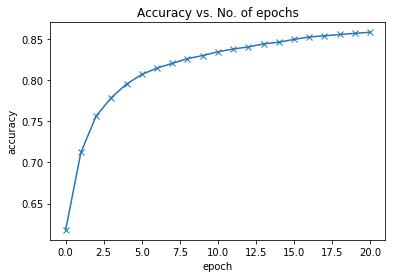

In [37]:
# Replace all values with result
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');